In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
%matplotlib inline

In [3]:
## Menggunakan Database Seluler
df = pd.read_csv('./dataset/seluler.csv')

In [6]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [52]:
# Mengecek Tipe Data
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [29]:
df.shape

(7043, 21)

In [31]:
# Mengecek Duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


<function matplotlib.pyplot.show(*args, **kw)>

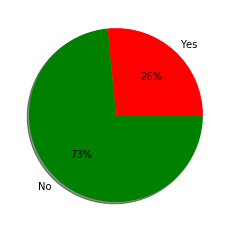

In [18]:
## Mencari Churn Rate Dari Penggunaan Seluler
churn_yes_count = df[df['Churn']=='Yes']['Churn'].count()
churn_no_count = df[df['Churn']=='No']['Churn'].count()

persentase = [churn_yes_count,churn_no_count]
name = ['Yes','No']

plt.pie(
    persentase,
    labels=name,
    colors=['r','g'],
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%i%%'
)

plt.show

# Definisi Masalah Dari Dataset
Ada nya Churn rate sebesar 26% dari pengguna layanan seluler. Angka 26% menunjukan sekira nya satu dari empat pengguna layanan seluler memilih untuk berpindah ke provider lain. Mengakibatkan turun nya jumlah pengguna yang bisa berdampak ke penurunan omset.

# Definisi Tujuan EDA
Menganalisa faktor yang menyebabkan pengguna memilih untuk berpindah ke provider lain.

# Analisa Deskriptif & Handling Misssing Value/Outliers

In [20]:
# Mengecek presentase missing value
(df.isnull().sum()/len(df))*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

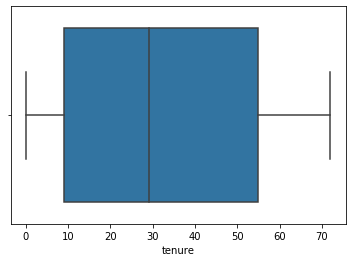

In [32]:
#Mengecek Outliers pada kolom tenure
sns.boxplot(x=df["tenure"])

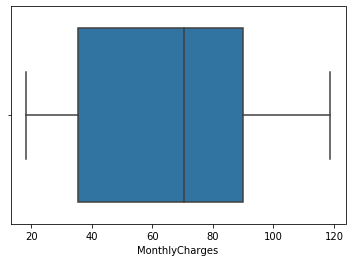

In [33]:
#Mengecek Outliers pada kolom MonthlyCharges
sns.boxplot(x=df["MonthlyCharges"])

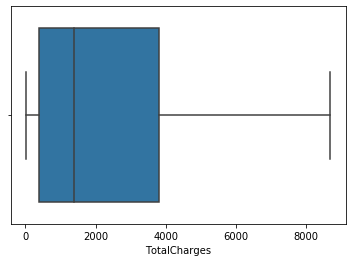

In [53]:
#Mengubah tipe data kolom TotalCharge menjadi float dan mengecek Outliers pada kolom Total Charges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
sns.boxplot(x=df["TotalCharges"])

# Analisis Data

Menentukan feature value penyebab churn rate. <br>
Target = Churn <br>
Feature Value = gender, tenure, Contract, PaymentMethod, PhoneService, InternetService, MonthlyCharges, TotalCharges

In [54]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [55]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [57]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


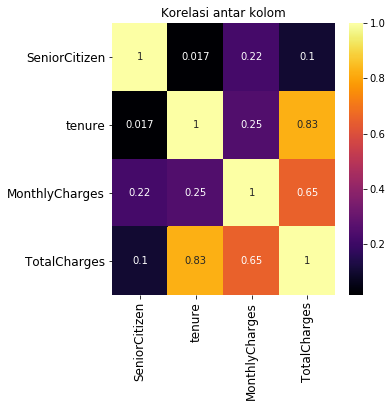

In [60]:
# Melihat Korelasi antar kolom
fig=plt.gcf()
sns.heatmap(df.corr(), cmap='inferno',annot=True).set_title("Korelasi antar kolom")

fig.set_size_inches(5,5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Terlihat bahwa ada korelasi yang cukup kuat antara tenure dan TotalCharges juga MonthlyCharges terhadap TotalCharges.

# Visualisasi Data

### Gender

<function matplotlib.pyplot.show(*args, **kw)>

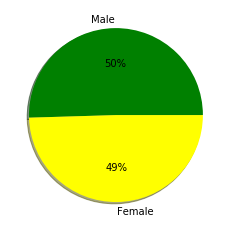

In [64]:
## Melihat target market melalui gender
gender_male_count = df[df['gender']=='Male']['gender'].count()
gender_female_count = df[df['gender']=='Female']['gender'].count()

persentase = [gender_male_count,gender_female_count]
name = ['Male','Female']

plt.pie(
    persentase,
    labels=name,
    colors=['green','yellow'],
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%i%%'
)

plt.show

Terlihat bahwa pengguna provider seluler terbagi rata antara laki laki dan perempuan.

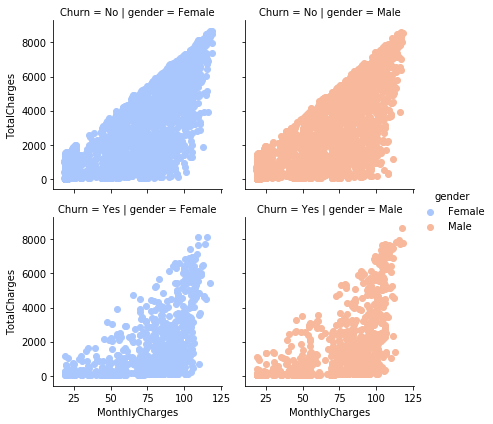

In [99]:
cel = sns.FacetGrid(df, col="gender",  row="Churn", hue='gender', palette='coolwarm')
cel.map(plt.scatter, "MonthlyCharges","TotalCharges").add_legend()

Visualisasi diatas menunjukan besarnya MonthlyCharges berbanding lurus dengan TotalCharges untuk
pelanggan yang tidak pindah ke provider lain. Sedangkan untuk pelanggan yang pindah ke provider lain,
juga masih berbanding lurus.

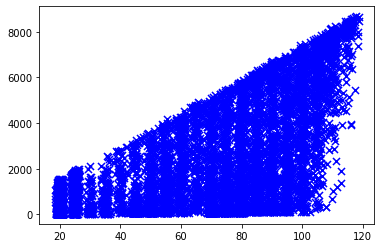

In [83]:
plt.scatter(df['MonthlyCharges'],df['TotalCharges'], #kordinat [x],[y]
            marker='x',
           s=50,
           color='b',
            zorder=2
           )
    

plt.show()

### PhoneService

In [132]:
df.groupby(['PhoneService','Churn'])['customerID','TotalCharges'].count()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


customerID  TotalCharges
PhoneService Churn                          
No           No            512           510
             Yes           170           170
Yes          No           4662          4653
             Yes          1699          1699

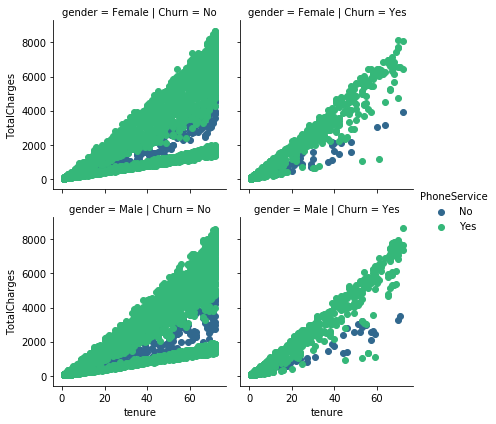

In [137]:
cel = sns.FacetGrid(df, col="Churn",  row="gender", hue='PhoneService', palette='viridis')
cel.map(plt.scatter, "tenure","TotalCharges").add_legend()

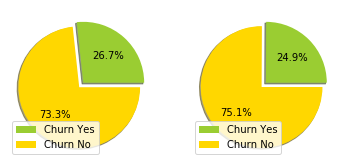

In [178]:
# Presentase Churn User pada pengguna yang menggunakan PhoneService
ps_yes_churn_yes = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]['PhoneService'].count()
ps_yes_churn_no = df[(df['PhoneService']=='Yes') & (df['Churn']=='No')]['PhoneService'].count()

# Presentase Churn User pada pengguna yang tidak menggunakan PhoneService
ps_no_churn_yes = df[(df['PhoneService']=='No') & (df['Churn']=='Yes')]['PhoneService'].count()
ps_no_churn_no = df[(df['PhoneService']=='No') & (df['Churn']=='No')]['PhoneService'].count()

persentase_ps_yes = [ps_yes_churn_yes,ps_yes_churn_no]
persentase_ps_no = [ps_no_churn_yes,ps_no_churn_no]

name = ['Churn Yes', 'Churn No']
colors = ['yellowgreen', 'gold']


plt.subplot(121)
plt.pie(
    persentase_ps_yes,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")

plt.subplot(122)
plt.pie(
    persentase_ps_no,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")

plt.show()

Dari visualisasi dan data diatas menunjukan PhoneServices tidak terlalu berpengaruh dengan churn user.

### Contract

In [153]:
df.groupby(['Contract','Churn'])['customerID','TotalCharges'].count()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


customerID  TotalCharges
Contract       Churn                          
Month-to-month No           2220          2220
               Yes          1655          1655
One year       No           1307          1306
               Yes           166           166
Two year       No           1647          1637
               Yes            48            48

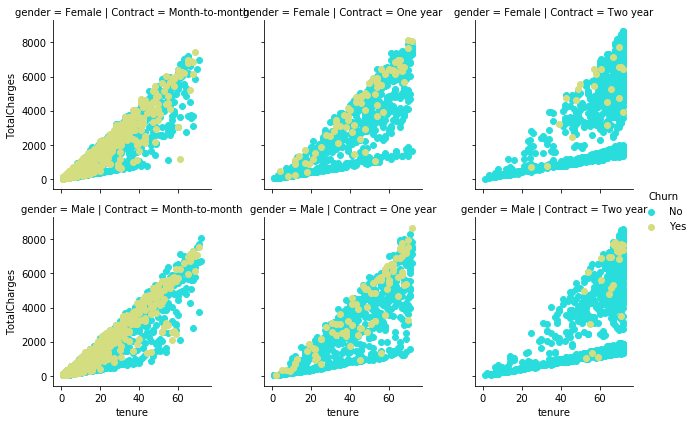

In [107]:
cel = sns.FacetGrid(df, col="Contract",  row="gender", hue='Churn', palette='rainbow')
cel.map(plt.scatter, "tenure","TotalCharges").add_legend()

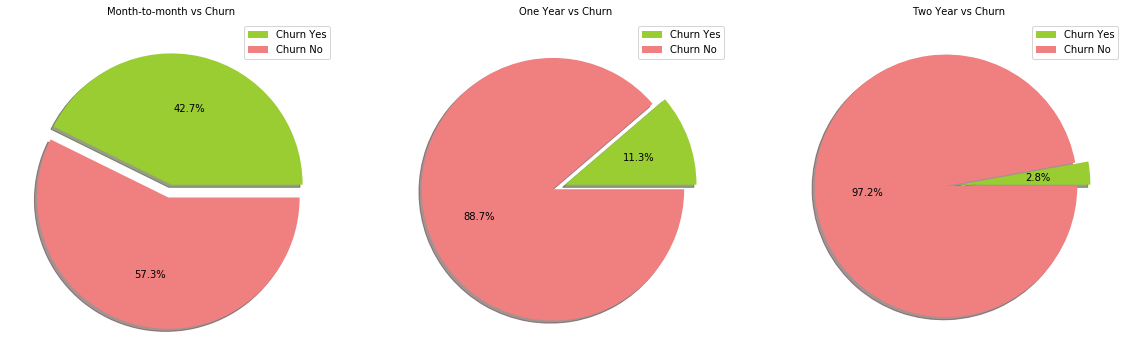

In [177]:
contract_month_churn_yes = df[(df['Contract']=='Month-to-month') & (df['Churn']=='Yes')]['customerID'].count()
contract_month_churn_no = df[(df['Contract']=='Month-to-month') & (df['Churn']=='No')]['customerID'].count()

contract_one_churn_yes = df[(df['Contract']=='One year') & (df['Churn']=='Yes')]['customerID'].count()
contract_one_churn_no = df[(df['Contract']=='One year') & (df['Churn']=='No')]['customerID'].count()

contract_two_churn_yes = df[(df['Contract']=='Two year') & (df['Churn']=='Yes')]['customerID'].count()
contract_two_churn_no = df[(df['Contract']=='Two year') & (df['Churn']=='No')]['customerID'].count()



persentase_month = [contract_month_churn_yes,contract_month_churn_no]
persentase_one = [contract_one_churn_yes,contract_one_churn_no]
persentase_two = [contract_two_churn_yes,contract_two_churn_no]

name = ['Churn Yes', 'Churn No']
colors = ['yellowgreen', 'lightcoral']

plt.figure('Grafik Kontrak dengan Churn User', figsize=(20,10))

plt.subplot(131)
plt.title("Month-to-month vs Churn",size=10)
plt.pie(
    persentase_month,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")


plt.subplot(132)
plt.title("One Year vs Churn",size=10)
plt.pie(
    persentase_one,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")

plt.subplot(133)
plt.title("Two Year vs Churn",size=10)
plt.pie(
    persentase_two,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")





plt.show()

Terlihat bahwa semakin pendek kontrak, semakin mudah pelanggan berpindah ke provider lain. Sebaliknya, semakin panjang kontrak mengakibatkan pelanggan tetap menggunakan layanan.

### Payment Method

In [129]:
df.groupby(['PaymentMethod','Churn'])['customerID','TotalCharges'].count()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


customerID  TotalCharges
PaymentMethod             Churn                          
Bank transfer (automatic) No           1286          1284
                          Yes           258           258
Credit card (automatic)   No           1290          1289
                          Yes           232           232
Electronic check          No           1294          1294
                          Yes          1071          1071
Mailed check              No           1304          1296
                          Yes           308           308

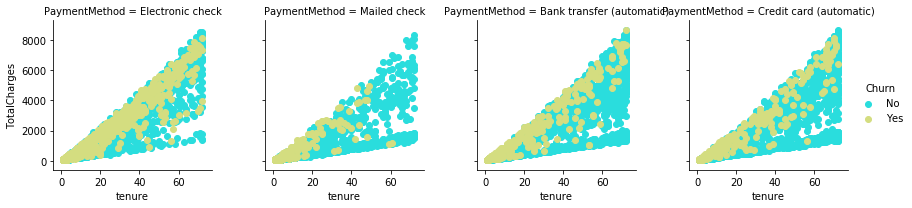

In [106]:
cel = sns.FacetGrid(df, col="PaymentMethod", hue='Churn', palette='rainbow')
cel.map(plt.scatter, "tenure","TotalCharges").add_legend()

Terlihat bahwa tingkat churn user pada pembayaran menggunakan Electronic Check adalah yang paling tinggi
sedangkan pembayaran menggunakan mailed check menghasilkan churn rate lebih rendah.

### InternetService

In [128]:
df.groupby(['InternetService','Churn'])['customerID','TotalCharges'].count()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


customerID  TotalCharges
InternetService Churn                          
DSL             No           1962          1957
                Yes           459           459
Fiber optic     No           1799          1799
                Yes          1297          1297
No              No           1413          1407
                Yes           113           113

<function matplotlib.pyplot.show(*args, **kw)>

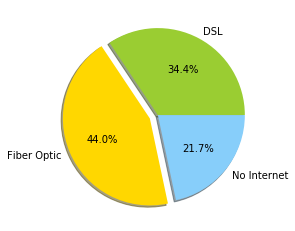

In [179]:
# Overal Presentase pengguna layanan internet service

is_dsl = df[df['InternetService']=='DSL']['InternetService'].count()
is_fo = df[df['InternetService']=='Fiber optic']['InternetService'].count()
is_no = df[df['InternetService']=='No']['InternetService'].count()

persentase = [is_dsl,is_fo,is_no]
name = ['DSL','Fiber Optic', 'No Internet']

colors = ['yellowgreen', 'gold', 'lightskyblue']

plt.pie(
    persentase,
    labels=name,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1, 0)
)

plt.show

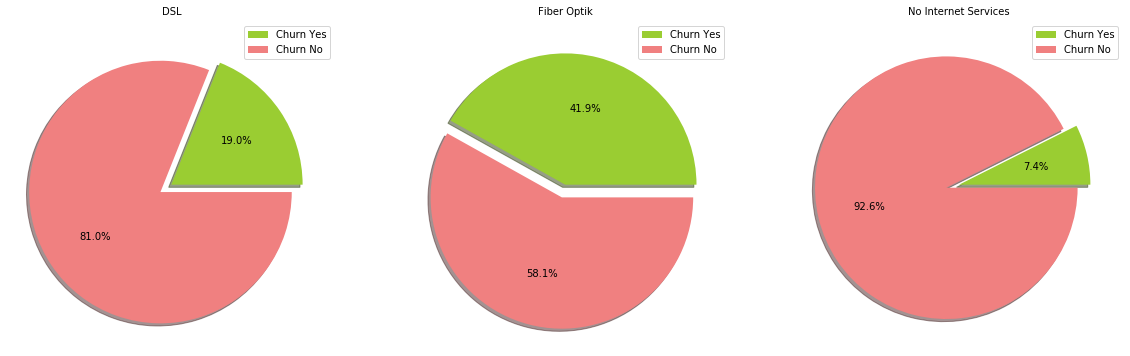

In [169]:
is_dsl_churn_yes = df[(df['InternetService']=='DSL') & (df['Churn']=='Yes')]['customerID'].count()
is_dsl_churn_no = df[(df['InternetService']=='DSL') & (df['Churn']=='No')]['customerID'].count()

is_fo_churn_yes = df[(df['InternetService']=='Fiber optic') & (df['Churn']=='Yes')]['customerID'].count()
is_fo_churn_no = df[(df['InternetService']=='Fiber optic') & (df['Churn']=='No')]['customerID'].count()

is_no_churn_yes = df[(df['InternetService']=='No') & (df['Churn']=='Yes')]['customerID'].count()
is_no_churn_no = df[(df['InternetService']=='No') & (df['Churn']=='No')]['customerID'].count()



persentase_dsl = [is_dsl_churn_yes,is_dsl_churn_no]
persentase_fo = [is_fo_churn_yes,is_fo_churn_no]
persentase_no = [is_no_churn_yes,is_no_churn_no]
name = ['Churn Yes', 'Churn No']

colors = ['yellowgreen', 'lightcoral']

plt.figure('Grafik InternetService dengan Churn User', figsize=(20,10))

plt.subplot(131)
plt.title("DSL",size=10)
plt.pie(
    persentase_dsl,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")


plt.subplot(132)
plt.title("Fiber Optik",size=10)
plt.pie(
    persentase_fo,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")

plt.subplot(133)
plt.title("No Internet Services",size=10)
plt.pie(
    persentase_no,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")





plt.show()

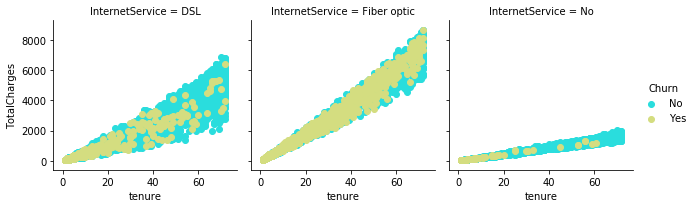

In [117]:
cel = sns.FacetGrid(df, col="InternetService", hue='Churn', palette='rainbow')
cel.map(plt.scatter, "tenure","TotalCharges").add_legend()

43% atau hampir setengah dari total pelanggan memilih internet dengan fiber optik. Berdasarkan visualisasi 
dan data diatas, terlihat bahwa churn user paling banyak ada di pengguna internet servis dengan fiber 
optic yang menghasilkan presentasi churn user sebanyak 41.9% atau setengah dari pengguna layanan internet
fiber optik memutuskan untuk berpindah ke provider lain.

### Tech Support

In [182]:
df.groupby(['TechSupport','Churn'])['customerID','TotalCharges'].count()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


customerID  TotalCharges
TechSupport         Churn                          
No                  No           2027          2026
                    Yes          1446          1446
No internet service No           1413          1407
                    Yes           113           113
Yes                 No           1734          1730
                    Yes           310           310

<function matplotlib.pyplot.show(*args, **kw)>

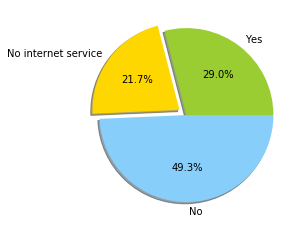

In [184]:
# Overal Presentase pengguna layanan TechSupport

tech_yes = df[df['TechSupport']=='Yes']['TechSupport'].count()
tech_no_is = df[df['TechSupport']=='No internet service']['TechSupport'].count()
tech_no = df[df['TechSupport']=='No']['TechSupport'].count()

persentase = [tech_yes,tech_no_is,tech_no]
name = ['Yes','No internet service', 'No']

colors = ['yellowgreen', 'gold', 'lightskyblue']

plt.pie(
    persentase,
    labels=name,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1, 0)
)

plt.show

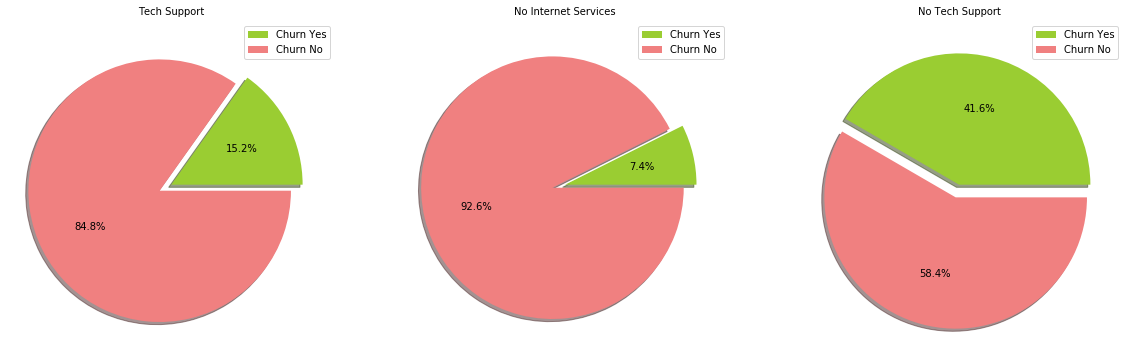

In [187]:
tech_yes_churn_yes = df[(df['TechSupport']=='Yes') & (df['Churn']=='Yes')]['customerID'].count()
tech_yes_churn_no = df[(df['TechSupport']=='Yes') & (df['Churn']=='No')]['customerID'].count()

tech_no_is_churn_yes = df[(df['TechSupport']=='No internet service') & (df['Churn']=='Yes')]['customerID'].count()
tech_no_is_churn_no = df[(df['TechSupport']=='No internet service') & (df['Churn']=='No')]['customerID'].count()

tech_no_churn_yes = df[(df['TechSupport']=='No') & (df['Churn']=='Yes')]['customerID'].count()
tech_no_churn_no = df[(df['TechSupport']=='No') & (df['Churn']=='No')]['customerID'].count()



persentase_yes = [tech_yes_churn_yes,tech_yes_churn_no]
persentase_no_is = [tech_no_is_churn_yes,tech_no_is_churn_no]
persentase_no = [tech_no_churn_yes,tech_no_churn_no]
name = ['Churn Yes', 'Churn No']

colors = ['yellowgreen', 'lightcoral']

plt.figure('Grafik TechSupport dengan Churn User', figsize=(20,10))

plt.subplot(131)
plt.title("Tech Support",size=10)
plt.pie(
    persentase_yes,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")


plt.subplot(132)
plt.title("No Internet Services",size=10)
plt.pie(
    persentase_no_is,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")

plt.subplot(133)
plt.title("No Tech Support",size=10)
plt.pie(
    persentase_no,
    colors=colors,
    startangle=0,
    shadow=True,
    textprops={
        'size': 10,
        'color': 'black'
    },
    autopct = '%1.1f%%',
    explode = (0, 0.1)
)
plt.legend(labels=name, loc="best")





plt.show()

Terlihat dari grafik diatas churn rate paling banyak ada di layanan tampa tech support. Hampir setengah
pengguna layanan tampa tech support memilih berpindah ke provider lain.

### TotalCharges, MonthlyCharges & tenure

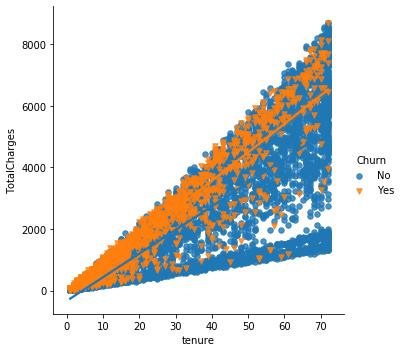

In [176]:
sns.lmplot(x='tenure', y='TotalCharges', data=df, hue='Churn', markers=['o','v'], scatter_kws={'s':30})

Dari visualisasi diatas menunjukan bahwa semakin tinggi tingkat tenure maka semakin kecil kemungkinan
pelanggan berpindah ke provider lain. Churn rate terlihat paling banyak berada di titik tenure bernilai 
0 - 20, selanjutnya mulai berkurang perlahan - lahan.

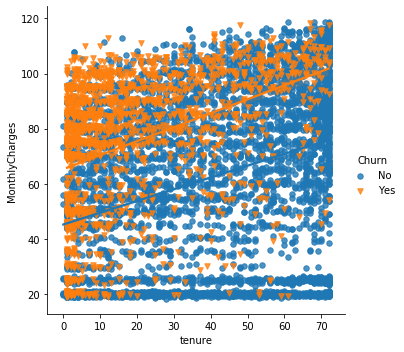

In [180]:
sns.lmplot(x='tenure', y='MonthlyCharges', data=df, hue='Churn', markers=['o','v'], scatter_kws={'s':30})

# Insight, Kesimpulan dan Saran berdasarkan EDA

Berdasarkan EDA mengenai provider seluler ini, saya menganalisa faktor - faktor yang mempengaruhi terjadinya churn user. Telah di tampilkan diatas bahwa churn user dari provider seluler ini sebanyak 
26% atau lebih dari 1/4. Satu dari empat orang pengguna provider seluler memutuskan untuk berpindah ke 
provider lain.

Setelah menganalisa dan memvisualisasikan feature value, dapat dilihat diatas, bahwa ada nya beberapa feature yang mengakibatkan besarnya churn user rate.

Pada bagian Contract, dapat dilihat bahwa semakin lama jangka kontrak dengan pelanggan akan membuat churn rate menjadi lebih rendah. Kontrak per bulan menghasilkan churn rate 42,7% sedangkan kontrak 2 tahun hanya menghasilkan churn rate 2,8%. Dari hal ini bisa pihak provider seluler bisa mencari cara bagaimana meyakinkan pelanggan untuk mengambil kontrak 2.

Pada bagian InternetService, pada layanan menggunakan Fiber Optik menghasilkan churn rate dengan angka tertinggi di 41.9%, hampir setengah dari pengguna. Sedangkan layanan tampa menggunakan internet service hanya menghasilkan 2%. Bisa kita lihat mungkin ada nya flow yang kurang baik di layanan internet service dengan fiber optik.

Pada bagian TechSupport, churn rate terbesar ada di layanan internet tampa tech support, yaitu sebesar 41,6%. Jika dibandingkan layanan internet dengan tech support yang bernilai 15% atau hampir 1/3 nya, bisa disimpulkan bahwa layanan internet tampa tech support tidak berjalan dengan baik sehingga mengakibatkan pelanggan berpindah provider.

Untuk PaymentMethod, tingkat churn user pada pembayaran menggunakan Electronic Check adalah yang paling tinggi. Sedangkan pembayaran menggunakan mailed check menghasilkan churn rate lebih rendah. Hal ini bisa diselidiki lebih lanjut demi mengurangi besarnya churn rate yang dihasilkan pembayaran dengan Electronic Check.

Kesimpulan yang bisa diambil dari EDA seluler diatas, bahwa benar adanya faktor - faktor yang mempengaruhi tinggi nya tingkat churn rate. Dengan visualisasi diatas, terlihat di segmen mana kah provider seluler harus fokus memperbaiki kinerja nya sehingga bisa menurunkan angka churn rate.